<p style="text-align:center">
    <a href="https://www.ict.mahidol.ac.th/en/" target="_blank">
    <img src="https://www3.ict.mahidol.ac.th/ICTSurveysV2/Content/image/MUICT2.png" width="400" alt="Faculty of ICT">
    </a>
</p>

# Tutorial 13: Basic Text Mining
This tutorial provides a hands-on introduction to text classification using Python and a public sentiment analysis dataset. You'll learn the essential steps involved in building a text classification model, from understanding the data to deploying it as an interactive web application.

#### Part 1: Data Processing and Exploratory Data Analysis (EDA)
We begin by loading the IMDB movie review dataset and performing crucial data preprocessing steps, including text cleaning, tokenization, stop word removal, and lemmatization. Through exploratory data analysis, we'll gain insights into the dataset using visualizations like sentiment distribution charts and word clouds.

#### Part 2: Text Representation
Next, we'll delve into converting our preprocessed text data into numerical representations that machine learning models can understand. We'll explore two fundamental techniques: Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF), understanding their principles and implementation using scikit-learn.

#### Part 3: Classification Model Selection and Evaluation
In this core section, we'll train and evaluate several popular classification models, including Naive Bayes, Logistic Regression, Support Vector Machines (SVM), and Random Forest, using both BoW and TF-IDF features. We'll use the macro-average F1 score as our primary metric to compare model performance and select the best-performing model for our sentiment analysis task. Finally, we'll save the chosen model, along with its associated vectorizer and label encoder, for deployment.

#### Part 4: Model Deployment with Streamlit
In the final part of the tutorial, we'll leverage the power of Streamlit to deploy our saved sentiment analysis model as a simple and interactive web application. You'll learn how to create a user interface where users can input movie reviews and receive real-time sentiment predictions, bringing your machine learning model to life.

By the end of this tutorial, you will have a solid understanding of the text classification pipeline and the practical skills to build, evaluate, and deploy your own text-based machine learning models.

## Part 01: Text Preprocessing and EDA
We will explore the fundamentals of text classification using a small public sentiment analysis dataset. We will focus on data processing and exploratory data analysis (EDA) in this first part.

### 1. Introduction:
Text classification is a common task in Natural Language Processing (NLP). It involves assigning labels or categories to text documents. In this tutorial, we will work with a sentiment analysis dataset to classify text as positive or negative. We will use a tiny subset of the IMDB Dataset of Movie Reviews from Kaggle ('IMDB Dataset_tiny.csv') as our case study.

In [ ]:
import time

start = time.time()

In [ ]:
#swifter is a library that intelligently applies operations to Pandas DataFrames,
#automatically choosing the fastest method (vectorized, Dask, or regular Pandas)
#based on the data size and the operation.

!pip install swifter

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import swifter

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcpearl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rcpearl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('datasets/sentimentdataset.csv')
except FileNotFoundError:
    print("Error: 'IMDB Dataset.csv' not found. Please download it from Kaggle and place it in the current directory.")
    exit()

In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
# Check the shape and data types
print("\nDataset shape:")
print(df.shape)
print("\nData types:")
print(df.info())


Dataset shape:
(732, 15)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [ ]:
# Check the distribution of sentiment labels
print("\nSentiment label distribution:")
print(df['Sentiment'].value_counts())


Sentiment label distribution:
Sentiment
Neutral     341
Positive    286
Negative    105
Name: count, dtype: int64


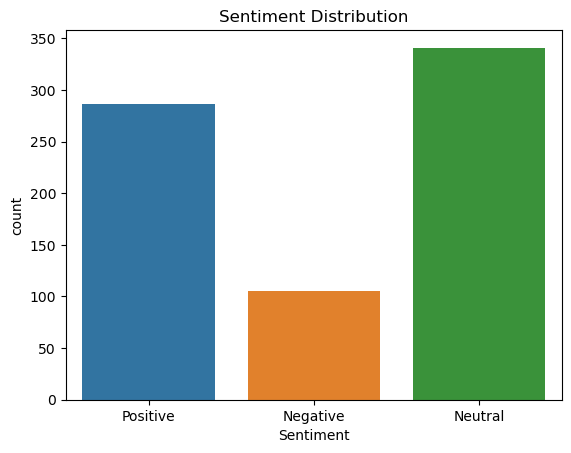

In [ ]:
# Visualize the sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

### 2. Text Preprocessing:
We need to clean and preprocess the text data to make it suitable for machine learning models.

In [ ]:
stopwords_set = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove non-alphanumeric characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Lowercase text
    text = text.lower()
    # Tokenize text
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords_set]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing to the 'review' column
df['Text'] = df['Text'].swifter.apply(preprocess_text)

Pandas Apply:   0%|          | 0/732 [00:00<?, ?it/s]

In [ ]:
# Display the preprocessed text (first 5 rows)
print("\nPreprocessed text (first 5 rows):")
print(df['Text'].head())


Preprocessed text (first 5 rows):
0         enjoying beautiful day park
1            traffic terrible morning
2            finished amazing workout
3    excited upcoming weekend getaway
4    trying new recipe dinner tonight
Name: Text, dtype: object


### 3. Exploratory Data Analysis (EDA):
We will explore the preprocessed text data to gain insights.

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud

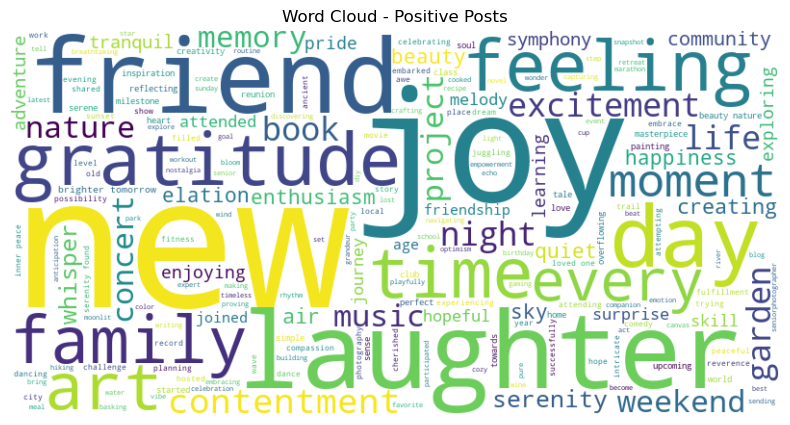

In [ ]:
# Word Cloud for positive post
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Posts')
plt.axis('off')
plt.show()

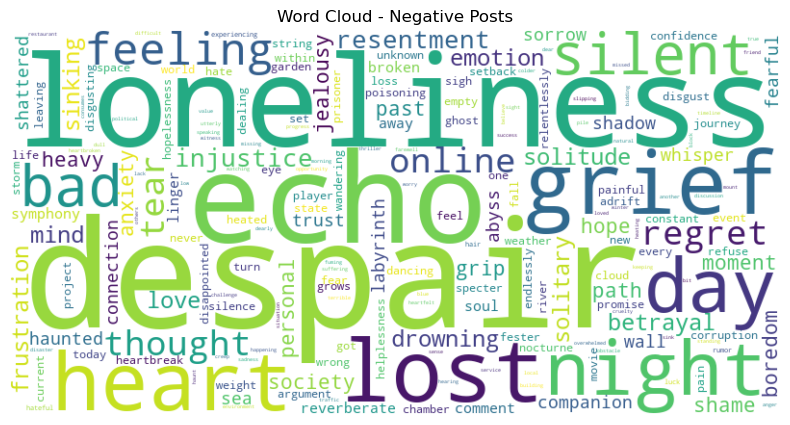

In [ ]:
# Word Cloud for negative post
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Posts')
plt.axis('off')
plt.show()

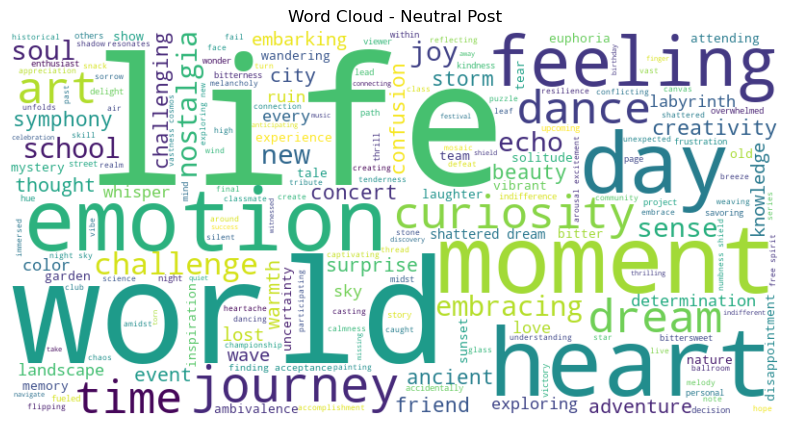

In [ ]:
# Word Cloud for neutral post
neutral_reviews = ' '.join(df[df['Sentiment'] == 'Neutral']['Text'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud - Neutral Post')
plt.axis('off')
plt.show()

In [ ]:
# Average review length per sentiment
df['Text_length'] = df['Text'].apply(lambda x: len(x.split()))
avg_length = df.groupby('Sentiment')['Text_length'].mean()
print("\nAverage Text length per sentiment:")
print(avg_length)


Average Text length per sentiment:
Sentiment
Negative    7.019048
Neutral     8.741935
Positive    7.814685
Name: Text_length, dtype: float64


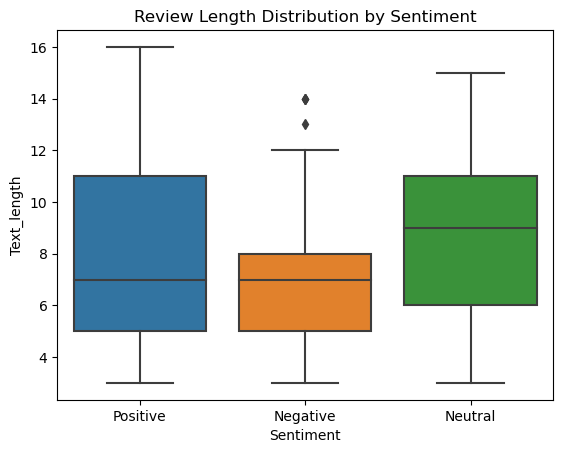

In [ ]:
# Visualize post length distribution
sns.boxplot(x='Sentiment', y='Text_length', data=df)
plt.title('Review Length Distribution by Sentiment')
plt.show()

## Part 02: Text Representation
Continuing from Part 1, we will now focus on text representation, converting the preprocessed text data into numerical features that machine learning models can understand.

### 1. Introduction to Text Representation:

Machine learning models require numerical input. Therefore, we need to transform our text data into numerical vectors. We will explore two common text representation methods: Bag-of-Words (BoW) and TF-IDF.

### 2. Bag-of-Words (BoW):

BoW represents text as a collection of word counts. It creates a vocabulary of all unique words in the corpus and counts the occurrences of each word in each document.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Initialize CountVectorizer
vectorizer_bow = CountVectorizer()

In [ ]:
# Fit and transform the text data
X_bow = vectorizer_bow.fit_transform(df['Text'])

In [ ]:
# Convert the sparse matrix to a DataFrame for easier inspection (optional)
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

In [ ]:
# Display the shape of the BoW matrix
print("Shape of BoW matrix:", X_bow.shape)

Shape of BoW matrix: (732, 2274)


In [ ]:
# Display the first few rows of the BoW DataFrame (optional)
# print("\nFirst few rows of BoW DataFrame:")
# display(df_bow.head())
# display(df_bow['movie'].head())

### 3. Term Frequency-Inverse Document Frequency (TF-IDF):

TF-IDF weights words based on their importance in a document and across the corpus. It reduces the importance of common words and increases the importance of rare words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Initialize TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

In [ ]:
# Fit and transform the text data
X_tfidf = vectorizer_tfidf.fit_transform(df['Text'])

In [ ]:
# Convert the sparse matrix to a DataFrame for easier inspection (optional)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [ ]:
# Display the shape of the TF-IDF matrix
print("\nShape of TF-IDF matrix:", X_tfidf.shape)


Shape of TF-IDF matrix: (732, 2274)


In [ ]:
# # Display the first few rows of the TF-IDF DataFrame (optional)
# print("\nFirst few rows of TF-IDF DataFrame:")
# display(df_tfidf.head())
# display(df_tfidf['movie'].head())

### 4. Preparing Data for Model Training:

We need to split the data into training and testing sets and convert the sentiment labels into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])  # 0: negative, 1: positive

In [ ]:
# Split data into training and testing sets
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shapes of the training and testing sets
print("\nBoW Training set shape:", X_bow_train.shape, y_bow_train.shape)
print("BoW Testing set shape:", X_bow_test.shape, y_bow_test.shape)
print("\nTF-IDF Training set shape:", X_tfidf_train.shape, y_tfidf_train.shape)
print("TF-IDF Testing set shape:", X_tfidf_test.shape, y_tfidf_test.shape)


BoW Training set shape: (585, 2274) (585,)
BoW Testing set shape: (147, 2274) (147,)

TF-IDF Training set shape: (585, 2274) (585,)
TF-IDF Testing set shape: (147, 2274) (147,)


## Part 03: Model Selection & Evaluation
Continuing from Part 2, we will now focus on model selection, training, and evaluation.
We will compare different classification models using both Bag-of-Words (BoW) and TF-IDF representations.

### 1. Introduction to Model Selection:

We will train and evaluate several classification models using both BoW and TF-IDF features.
We will use macro-average F1 score as the main evaluation metric, as it provides a balanced measure of precision and recall across all classes.

### 2. Model Training and Evaluation:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import joblib  # For saving the model

In [ ]:
# Models to Train and Evaluate
models = {
    'Naive Bayes (BoW)': MultinomialNB(),
    'Logistic Regression (BoW)': LogisticRegression(max_iter=1000),
    'SVM (BoW)': SVC(kernel='linear', probability=True),
    'Random Forest (BoW)': RandomForestClassifier(n_jobs=-1),
    'Naive Bayes (TF-IDF)': MultinomialNB(),
    'Logistic Regression (TF-IDF)': LogisticRegression(max_iter=1000),
    'SVM (TF-IDF)': SVC(kernel='linear', probability=True),
    'Random Forest (TF-IDF)': RandomForestClassifier(n_jobs=-1)
}

In [ ]:
results = {}

for name, model in models.items():
    if 'BoW' in name:
        model.fit(X_bow_train, y_bow_train)
        y_pred = model.predict(X_bow_test)
    else:
        model.fit(X_tfidf_train, y_tfidf_train)
        y_pred = model.predict(X_tfidf_test)

    f1_macro = f1_score(y_bow_test if 'BoW' in name else y_tfidf_test, y_pred, average='macro')
    results[name] = f1_macro
    print(f"{name} - Macro-average F1 Score: {f1_macro:.4f}")

Naive Bayes (BoW) - Macro-average F1 Score: 0.6404
Logistic Regression (BoW) - Macro-average F1 Score: 0.6020
SVM (BoW) - Macro-average F1 Score: 0.6735
Random Forest (BoW) - Macro-average F1 Score: 0.5569
Naive Bayes (TF-IDF) - Macro-average F1 Score: 0.4600
Logistic Regression (TF-IDF) - Macro-average F1 Score: 0.4549
SVM (TF-IDF) - Macro-average F1 Score: 0.5221
Random Forest (TF-IDF) - Macro-average F1 Score: 0.5394


In [ ]:
# Find the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")


Best Model: SVM (BoW)


### 3. Save the Best Model:

We will save the best model for deployment with Streamlit.

In [ ]:
if 'BoW' in best_model_name:
    joblib.dump((best_model, vectorizer_bow, label_encoder), 'sentiment_model_bow.joblib')
else:
    joblib.dump((best_model, vectorizer_tfidf, label_encoder), 'sentiment_model_tfidf.joblib')

print("\nBest model saved as 'sentiment_model_bow.joblib' or 'sentiment_model_tfidf.joblib'")


Best model saved as 'sentiment_model_bow.joblib' or 'sentiment_model_tfidf.joblib'


## Part 04: Model Deployment with Streamlit
Continuing from Part 3, we will now focus on deploying the saved model with Streamlit.
We will create a simple web application that allows users to input text and get sentiment predictions.

Streamlit App Implementation:
- Open 'app_sentiment.py' in the same working directory as this notebook.
- Make sure that either 'sentiment_model_bow.joblib' or 'sentiment_model_tfidf.joblib' is in this directory.
- Open another Anaconda prompt, direct to the working directory.
- Execute streamlit `run app_sentiment.py`

In [ ]:
# !pip install streamlit
# !streamlit run app_sentiment.py

In [ ]:
end = time.time()
print(start)
print(end)
print(end-start)

1745131034.2896872
1745131038.462216
4.1725287437438965


<p style="text-align:center;">That's it! Congratulations! <br>
    Let's now work on your lab assigment.</p>